In [280]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Warnings
import warnings;
warnings.simplefilter('ignore')

# Path
ROOT_PATH = os.path.abspath(os.path.join('../'+os.path.dirname('__file__')))
ROOT_PATH

'c:\\Users\\jmoscoso04\\OneDrive - Cementos Argos S.A\\Documentos\\Proyectos\\distancia_imagenes\\code'

##### Tenemos una matriz M que representa una imagen en escala de grises, donde cada fila representa a una persona y cada columna representa un pixel. Donde n será el número de personas.

# Punto 11

# Captura de imagenes y agrupar en matriz

In [281]:
# Lista para almacenar las matrices de las imágenes
matrices = []
matrices_reshape = []
persona = []
images = []
import cv2
tamaño = (255, 255)
# Iterar sobre los archivos en el directorio
for archivo in os.listdir(ROOT_PATH +"/data/images/input/raw/"):
    # Comprobar si el archivo es una imagen
    if archivo.endswith(".jpg") or archivo.endswith(".png"):
        # Cargar la imagen
        imagen = Image.open(os.path.join(ROOT_PATH +"/data/images/input/raw/", archivo))
        img = cv2.imread(os.path.join(ROOT_PATH +"/data/images/input/raw/", archivo), 0)
        imagenes = np.vstack((img.flatten(), img.flatten()))

        # Escala de grises
        imagen = imagen.convert('L')
        # Redimensionar la imagen
        imagen = imagen.resize(tamaño)
        # Guardar la imagen redimensionada
        imagen.save(ROOT_PATH +"/data/images/input/gold/" + archivo)
        # Convertir la imagen en una matriz NumPy y agregarla a la lista
        matriz = np.asarray(imagen)
        matrices.append(matriz.reshape((-1,)))
        matrices_reshape.append(matriz)
        
        persona.append(archivo.split(".")[0])


# Convertir la matriz en un dataframe de pandas
# df_imagenes = pd.DataFrame(matrices)
df_imagenes = matrices

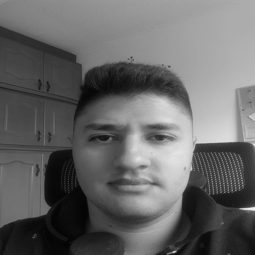

In [101]:
Image.fromarray(matrices_reshape[0])

##### Primero, necesitamos calcular la distancia de cada persona a todas las demás personas en la imagen, utilizando las cuatro normas matriciales: 1, 2, ∞ y Frobenius. Para esto, podemos utilizar la función scipy.spatial.distance_matrix, que calcula la matriz de distancias entre todas las filas de una matriz.

In [282]:
import numpy as np
from scipy.spatial import distance_matrix

# Calcular la matriz de distancias con las cuatro normas matriciales
D1 = distance_matrix(df_imagenes, df_imagenes, p=1)
D2 = distance_matrix(df_imagenes, df_imagenes, p=2)
Dinf = distance_matrix(df_imagenes, df_imagenes, p=np.inf)
DFro = distance_matrix(df_imagenes, df_imagenes)

# DFro = distance_matrix(df_imagenes, df_imagenes, p=np.linalg.norm(df_imagenes, 'fro'))  # https://www.youtube.com/watch?v=9IGaV_3HnGg&ab_channel=JohnOrtizOrdo%C3%B1ez

##### Ahora, necesitamos calcular el indicador de lejanía de cada persona. Esto se puede hacer calculando el promedio de las distancias de cada persona a todas las demás personas.

In [283]:
# Calcular el indicador de lejanía de cada persona
I1 = np.mean(D1, axis=1)
I2 = np.mean(D2, axis=1)
Iinf = np.mean(Dinf, axis=1)
IFro = np.mean(DFro, axis=1)

##### Finalmente, podemos encontrar la mediana de la imagen, es decir, la persona más típica, encontrando el índice del valor mínimo del indicador de lejanía para cada una de las normas matriciales.

In [284]:
# Encontrar la mediana de la imagen para cada una de las normas matriciales
mediana_1 = np.argmin(I1)
mediana_2 = np.argmin(I2)
mediana_inf = np.argmin(Iinf)
mediana_Fro = np.argmin(IFro)

print("La mediana de la imagen (usando norma 1) es la persona:", persona[mediana_1])
print("La mediana de la imagen (usando norma 2) es la persona:", persona[mediana_2])
print("La mediana de la imagen (usando norma infinito) es la persona:", persona[mediana_inf])
print("La mediana de la imagen (usando norma Frobenius) es la persona:", persona[mediana_Fro])

La mediana de la imagen (usando norma 1) es la persona: cr7siu
La mediana de la imagen (usando norma 2) es la persona: cr7siu
La mediana de la imagen (usando norma infinito) es la persona: Messi
La mediana de la imagen (usando norma Frobenius) es la persona: cr7siu


In [112]:
# Mostrar imagenes
fig, ax = plt.subplots(2, 2, figsize=(25,25))
ax[0,0].imshow(matrices_reshape[mediana_1], cmap='gray')
ax[0,0].set_title(f"La persona mediana (usando la norma 1) es {persona[mediana_1]}",fontsize=17)

ax[0,1].imshow(matrices_reshape[mediana_2], cmap='gray')
ax[0,1].set_title(f"La persona mediana (usando la norma 2) es {persona[mediana_2]}",fontsize=17)

ax[1,0].imshow(matrices_reshape[mediana_inf], cmap='gray')
ax[1,0].set_title(f"La persona mediana (usando la norma inf) es {persona[mediana_inf]}",fontsize=17)

ax[1,1].imshow(matrices_reshape[mediana_Fro], cmap='gray')
ax[1,1].set_title(f"La persona mediana (usando la norma fro) es {persona[mediana_Fro]}",fontsize=17)
plt.savefig(ROOT_PATH +"/data/images/output/results/persona_mediana.png")
plt.close()


In [330]:
alpha = [0, 1 ,2, 3]
behta = [1, 5, 7]

alpha = [x for x in alpha if behta not in alpha]
pd.DataFrame(alpha)

,0
0,0
1,1
2,2
3,3


In [347]:
alpha = pd.DataFrame(alpha)
alpha = alpha[~alpha[0].isin(notin)][0].to_list()

In [353]:
alpha = alpha[~alpha[0].isin(notin)][0].to_list()
alpha

[2, 3]

# Punto 12

In [120]:
amd_1 = np.array(Image.open(os.path.join(ROOT_PATH +"/data/images/input/silver/amd1.jpg")).convert("L").resize(tamaño))
amd_2 = np.array(Image.open(os.path.join(ROOT_PATH +"/data/images/input/silver/amd2.jpg")).convert("L").resize(tamaño))

matrices.append(amd_1.reshape((-1,)))
matrices.append(amd_2.reshape((-1,)))
matrices_reshape.append(amd_1)
matrices_reshape.append(amd_2)
persona.append('amd_1')
persona.append('amd_2')

In [109]:
# Calcular distancias
distances_l1 = []
distances_l2 = []
distances_linf = []
distances_frobenius = []

for i in range(len(matrices)):
    dist_l1 = 0
    dist_l2 = 0
    dist_linf = 0
    dist_frobenius = 0
    for j in range(len(matrices)):
        dist_l1 += np.sum(np.abs(matrices[i] - matrices[j]))
        dist_l2 += np.sqrt(np.sum((matrices[i] - matrices[j])**2))
        dist_linf = max(dist_linf, np.max(np.abs(matrices[i] - matrices[j])))
        dist_frobenius += np.sqrt(np.sum((matrices[i] - matrices[j])**2))
    distances_l1.append(dist_l1)
    distances_l2.append(dist_l2)
    distances_linf.append(dist_linf)
    distances_frobenius.append(dist_frobenius)

# Encontrar la mediana para cada norma matricial
median_l1 = np.argmin(distances_l1)
median_l2 = np.argmin(distances_l2)
median_linf = np.argmin(distances_linf)
median_frobenius = np.argmin(distances_frobenius)

print("Mediana para L1:", median_l1)
print("Mediana para L2:", median_l2)
print("Mediana para Linf:", median_linf)
print("Mediana para Frobenius:", median_frobenius)

# Construir vecindad con centro en mi imagen y un radio de 5
my_distances = []
for i in range(len(matrices)):
    dist = np.sqrt(np.sum((matrices[i] - amd_1.reshape((-1,)))**2))
    my_distances.append(dist)
nearest_indices = np.argsort(my_distances)[:5]


Mediana para L1: 1
Mediana para L2: 0
Mediana para Linf: 0
Mediana para Frobenius: 0


In [315]:
alpha = ["alpha", 'alpha1', 'betha', 'betha2', 'betha3']
# alpha = [x=1 for x in alpha if "alpha" not in x]

In [316]:
notin = []
for num, name in enumerate(persona):
    if 'juan' not in name:
        notin.append(num)
matrices_test = pd.DataFrame(matrices).loc[notin]


In [126]:
# Mostrar imágenes
amd_1_resized = Image.fromarray(amd_1)
amd_2_resized = Image.fromarray(amd_2)
img3_resized = Image.fromarray(matrices_reshape[nearest_indices[1]]).resize(tamaño)

fig, ax = plt.subplots(1, 3, figsize=(25,25))
ax[0].imshow(amd_1_resized, cmap='gray')
ax[0].set_title(f"Primera foto mía", fontsize=17)

ax[1].imshow(amd_2_resized, cmap='gray')
ax[1].set_title(f"Segunda foto mía",fontsize=17)

ax[2].imshow(img3_resized, cmap='gray')
ax[2].set_title(f"La persona mas parecida a mi {persona[nearest_indices[1]]}",fontsize=17)

plt.savefig(ROOT_PATH +"/data/images/output/results/parecido_a_mi.png")
plt.close()


In [253]:
# TODO
# Cluster
x = matrices[:-2]
x = pd.DataFrame(x)
y = np.array(Image.open(os.path.join(ROOT_PATH +"/data/images/input/silver/amd1.jpg")).convert("L").resize(tamaño)).flatten()
y = pd.DataFrame([y])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
label = kmeans.predict(y)
print("Tu imagen pertenece al grupo: ", label[0])

# colors = ['b', 'g', 'r']
# for i in range(3):
#     plt.plot(x[kmeans.labels_ == i], color = colors[i])
#     plt.plot(y, color= 'k', linewidth=5)
#     plt.show()

Tu imagen pertenece al grupo:  1


(-100.0, 100.0)

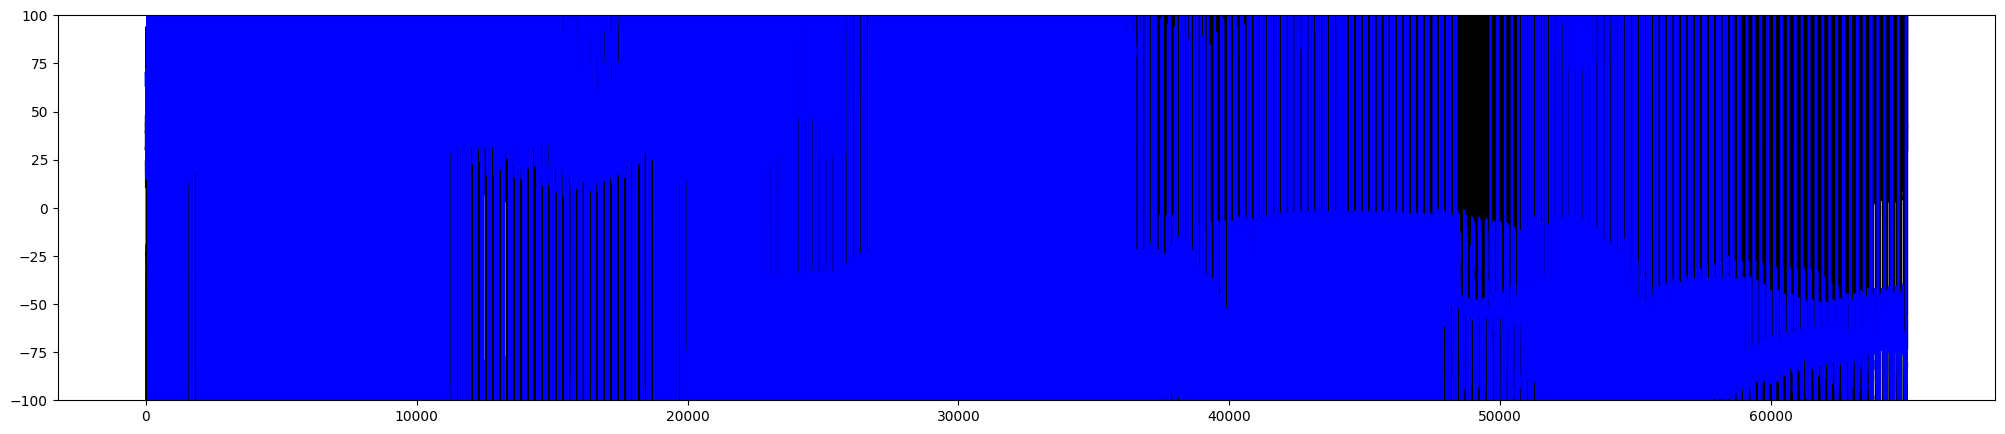

In [264]:
fig, ax = plt.subplots(1, 1, figsize=(25,5))
plt.plot(x[kmeans.labels_ == 0].T, color = 'k')
plt.plot(y.T, color = 'b')
plt.ylim(-100,100)
